# Carga de archivo .json

In [1]:
import pandas as pd
import numpy as np
import json

In [ ]:
# Leer el archivo JSON como una cadena de texto
with open('CDs_and_Vinyl_5.json', 'r') as file:
    json_data = file.readlines()

# Convertir cada línea de texto JSON en un diccionario
# y manejar excepciones si el formato de alguna línea es incorrecto
data = []
for line in json_data:
    try:
        data.append(json.loads(line))
    except json.JSONDecodeError as error:
        print(f"Error decoding JSON: {error} - Line: {line}")

# Crear un DataFrame a partir de la lista de diccionarios
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame para verificar
print(df.head())

Error decoding JSON: Unterminated string starting at: line 1 column 204 (char 203) - Line: {"overall": 5.0, "verified": true, "reviewTime": "07 18, 2015", "reviewerID": "A1GKQKAQCM39UX", "asin": "B00021LPIS", "style": {"Format:": " MP3 Music"}, "reviewerName": "Amazon Customer", "reviewText": "Great singer, great actors, voice
       reviewerID        asin      reviewerName  verified  \
0  A1H1DL4K669VQ9  0001393774   Judith Paladino      True   
1  A3V5XBBT7OZG5G  0001393774            gflady      True   
2  A3SNL7UJY7GWBI  0001393774  Lady Leatherneck      True   
3  A3478QRKQDOPQ2  0001393774             jacki      True   
4  A23M5VTSN2C3H1  0001393774           Caliope      True   

                                          reviewText  overall   reviewTime  \
0                           Love it!!  Great seller!      5.0  04 29, 2016   
1  One of my very favourite albums from one of my...      5.0  02 23, 2016   
2  THank you Jesus Lord God, that brother Green's...      5.0  02 11, 

In [ ]:
df

,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,style,vote,image
0,A1H1DL4K669VQ9,0001393774,Judith Paladino,True,Love it!! Great seller!,5.0,"04 29, 2016",Five Stars,1461888000,NaN,NaN,NaN
1,A3V5XBBT7OZG5G,0001393774,gflady,True,One of my very favourite albums from one of my...,5.0,"02 23, 2016",One of my very favourite albums from one of my...,1456185600,NaN,NaN,NaN
2,A3SNL7UJY7GWBI,0001393774,Lady Leatherneck,True,"THank you Jesus Lord God, that brother Green's...",5.0,"02 11, 2016",Five Stars,1455148800,NaN,NaN,NaN
3,A3478QRKQDOPQ2,0001393774,jacki,True,I recall loving his other albums and maybe thi...,5.0,"11 28, 2015",forgot but I figured on some of these artists ...,1448668800,NaN,NaN,NaN
4,A23M5VTSN2C3H1,0001393774,Caliope,True,Keith Green was a pioneer in the field of Chri...,5.0,"12 16, 2014",and I have loved every album he did,1418688000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
569017,A2ZU002RTHB9V2,B00021LPIS,Speedy,True,One of the best crooners,5.0,"08 11, 2016",Five Stars,1470873600,{'Format:': ' MP3 Music'},NaN,NaN
569018,AANMRNDWCOOHY,B00021LPIS,Kelly,True,Wonderful CD & Great Seller!!,5.0,"06 19, 2016",Five Stars,1466294400,{'Format:': ' Audio CD'},NaN,NaN
569019,A25IZ8TSBENCXS,B00021LPIS,C. L. Gosch,True,This was a Christmas gift for my son in law......,5.0,"02 4, 2016",He's very pleased with it,1454544000,{'Format:': ' Audio CD'},NaN,NaN
569020,A3NMD7O4FVF17B,B00021LPIS,don page,False,"If you are looking for the best overall ""top 4...",5.0,"09 26, 2015",The Most Complete Dean Martin Top 40 Collectio...,1443225600,{'Format:': ' Audio CD'},NaN,NaN


Una revisión rápida a mis datos me permite comprobar que tenemos 3 columnas que nos pueden interesar para llevar a cabo mi análisis de sentimiento: las columnas Overall, summary y reviewText.

# Analisis exploratorio

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569022 entries, 0 to 569021
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewerID      569022 non-null  object 
 1   asin            569022 non-null  object 
 2   reviewerName    568998 non-null  object 
 3   verified        569022 non-null  bool   
 4   reviewText      568984 non-null  object 
 5   overall         569022 non-null  float64
 6   reviewTime      569022 non-null  object 
 7   summary         568981 non-null  object 
 8   unixReviewTime  569022 non-null  int64  
 9   style           541193 non-null  object 
 10  vote            225467 non-null  object 
 11  image           1184 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 48.3+ MB


In [ ]:
len(df)

569022

In [ ]:
df.isnull().sum()

reviewerID             0
asin                   0
reviewerName          24
verified               0
reviewText            38
overall                0
reviewTime             0
summary               41
unixReviewTime         0
style              27829
vote              343555
image             567838
dtype: int64

In [ ]:
data[50]

{'overall': 5.0,
 'verified': True,
 'reviewTime': '07 14, 2015',
 'reviewerID': 'A1A5KF3F0Q3N8B',
 'asin': '0005164885',
 'style': {'Format:': ' Audio CD'},
 'reviewerName': 'G. Goins',
 'reviewText': 'Nice item.',
 'summary': 'CD',
 'unixReviewTime': 1436832000}

In [ ]:
df[['overall', 'summary', 'reviewText']]

,overall,summary,reviewText
0,5.0,Five Stars,Love it!! Great seller!
1,5.0,One of my very favourite albums from one of my...,One of my very favourite albums from one of my...
2,5.0,Five Stars,"THank you Jesus Lord God, that brother Green's..."
3,5.0,forgot but I figured on some of these artists ...,I recall loving his other albums and maybe thi...
4,5.0,and I have loved every album he did,Keith Green was a pioneer in the field of Chri...
...,...,...,...
569017,5.0,Five Stars,One of the best crooners
569018,5.0,Five Stars,Wonderful CD & Great Seller!!
569019,5.0,He's very pleased with it,This was a Christmas gift for my son in law......
569020,5.0,The Most Complete Dean Martin Top 40 Collectio...,"If you are looking for the best overall ""top 4..."


- Compruebo que, en la mayoría de los casos, la columna reviewText aporta mucha más información para mi análisis de sentimiento que cualquier otra columna, por lo que me quedo con ella y con overall para desarrollar mi modelo.

- Otra cosa de la que me doy cuenta es que, en algunos casos, reviewText tiene algunas valoraciones poco extensas y es probable que no nos faciliten un contexto que mejoraría la precisión del análisis de sentimientos.

- Decido quedarme únicamente con aquellos registros que tengan como mínimo 10 palabras.

- Eliminaré también los registros con valor NaN para la columna reviewText.

In [ ]:
# Cuento reviews con menos de 10 palabras para ver cuantos registros elimino.
short_reviews_count = df['reviewText'].dropna().apply(lambda x: len(x.split()) < 10).sum()

print(f"Reviews totales: {len(df)}")
print(f"Reviews con menos de 10 palabras: {short_reviews_count}")

Reviews totales: 569022
Reviews con menos de 10 palabras: 70615


- Compruebo que, filtrando por aquellas reviews con más de 10 palabras, eliminamos una cantidad muy alta de registros, pero dado que voy a realizar mi estudio con una muestra pequeña, prefiero que dicha muestra sea de la mayor calidad posible.

- Este filtrado no lo llevaría a cabo en el caso de querer trabajar con el total de los registros.

- En ese caso, valoraría cómo gestionar dichos registros o aplicaría un filtro menos restrictivo.

# Elimino registros con reviews poco extensas

In [ ]:
# Elimino filas donde la columna 'reviewText' contiene NaN
df_cleaned = df.dropna(subset=['reviewText'])

In [ ]:
# Filtro el DataFrame para quedarme solo con las reviews con 10 o más palabras
filtered_df = df_cleaned[df_cleaned['reviewText'].apply(lambda x: isinstance(x, str) and len(x.split()) >= 10)]

In [ ]:
len(filtered_df)

498369

In [ ]:
# Compruebo filtro anterior para ver reviews con menos de 10 palabras
short_reviews_verification = filtered_df['reviewText'].dropna().apply(lambda x: len(x.split()) < 10).sum()

print(f"Reviews totales: {len(filtered_df)}")
print(f"Reviews con menos de 10 palabras: {short_reviews_verification}")

Reviews totales: 498369
Reviews con menos de 10 palabras: 0


Dado que vamos a obtener una muestra de mis datos, compruebo cuántos registros tengo de cada categoría de overall para asegurarme de que puedo hacer la partición que quiero.

In [ ]:
# Verifico si hay suficientes registros en cada categoría
print(filtered_df['overall'].value_counts())

overall
5.0    319630
4.0    103919
3.0     40564
2.0     17377
1.0     16879
Name: count, dtype: int64


# Filtro por registros validos

Antes de obtener la muestra, voy a eliminar todos aquellos registros con valor Nan para la columna overall.

In [ ]:
# Eliminar filas donde la columna 'overall' contiene NaN
df_cleaned = filtered_df.dropna(subset=['overall'])


In [ ]:
# Verifico si hay suficientes registros en cada categoría
print(df_cleaned['overall'].value_counts())

overall
5.0    319630
4.0    103919
3.0     40564
2.0     17377
1.0     16879
Name: count, dtype: int64


In [ ]:
len(df_cleaned)

498369

In [ ]:
df_work = df_cleaned[['overall', 'reviewText']]

# Obtención de muestra para modelo

Dado que voy a dividir los sentimientos en dos categorías, con la intención de tener la muestra lo más balanceada posible, decido obtener 3000 registros de cada valor de overall si el overall es igual o inferior a 3, y 4500 registros de cada valor de overall en el caso contrario.

In [ ]:
# Función para tomar la muestra deseada de cada grupo
def sample_based_on_overall(df, value, n):
    return df[df['overall'] == value].sample(n=n, random_state=42)

# Listas para almacenar las muestras
samples = []

# Obtengo 3000 registros para cada valor de overall cuando es <= 3 y 4500 registros si overall > 3
for value in df_work['overall'].unique():
    if value <= 3:
        samples.append(sample_based_on_overall(df_work, value, 3000))
    else:
        samples.append(sample_based_on_overall(df_work, value, 4500))

# Combino todas las muestras
df_combined_sample = pd.concat(samples)

# Verifico el tamaño de la muestra combinada
print(df_combined_sample.shape)

(18000, 2)


In [ ]:
df_combined_sample['overall'].value_counts()

overall
5.0    4500
4.0    4500
3.0    3000
1.0    3000
2.0    3000
Name: count, dtype: int64

# Comprobación de mi muestra

Me aseguro de que la distribución de mis datos de muestra sea la deseada y verifico que no tengo registros con valores Nan.

In [ ]:
df_combined_sample

,overall,reviewText
335384,5.0,I like all the artist in this band. They make ...
165584,5.0,This is an odd affair...released 2 years after...
446601,5.0,So glad to find their albums in CD format! The...
512203,5.0,This is one of the best Opeth albums ever!!! I...
51099,5.0,The best Portishead album out there. I have th...
...,...,...
166724,2.0,Say you where an alien from another planetary ...
497749,2.0,Philip Glass didn't create anything new with t...
223260,2.0,nothing but a flat prelude of Cult's dissoluti...
2108,2.0,"This was an ""OK"" concert; BUT out in the Red R..."


In [ ]:
df_combined_sample['overall'].value_counts()

overall
5.0    4500
4.0    4500
3.0    3000
1.0    3000
2.0    3000
Name: count, dtype: int64

In [ ]:
print(df_combined_sample.isnull().sum())

overall       0
reviewText    0
dtype: int64


# Guardo archivo para conservar mis datos de trabajo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Definir la ruta en Google Drive donde deseas guardar el archivo CSV
ruta = '/content/drive/My Drive/NLP/df_combined_sample.csv'

# Guardar el DataFrame como CSV en la ruta especificada
df_combined_sample.to_csv(ruta, index=False)


In [ ]:
import os

# Listar archivos en la carpeta destino
print(os.listdir('/content/drive/My Drive/NLP'))

['df_work.csv', 'df_sample_15000.csv', 'df_music_data_clean.csv', 'df_sample_3000.csv', 'Practica_NLP.ipynb', 'df_combined_sample.csv']


# Carga de datos

In [ ]:
file_path = '/content/drive/My Drive/NLP/df_combined_sample.csv'

In [ ]:
df_music_data = pd.read_csv(file_path)

In [ ]:
df_music_data

,overall,reviewText
0,5.0,I like all the artist in this band. They make ...
1,5.0,This is an odd affair...released 2 years after...
2,5.0,So glad to find their albums in CD format! The...
3,5.0,This is one of the best Opeth albums ever!!! I...
4,5.0,The best Portishead album out there. I have th...
...,...,...
17995,2.0,Say you where an alien from another planetary ...
17996,2.0,Philip Glass didn't create anything new with t...
17997,2.0,nothing but a flat prelude of Cult's dissoluti...
17998,2.0,"This was an ""OK"" concert; BUT out in the Red R..."


Voy a determinar que las reviews positivas son aquellas con una valoracion igual o superior a 4 para la columna overall.

In [ ]:
# Creo la columna 'sentiment' basada en la columna 'overall'
df_music_data['sentiment'] = np.where(df_music_data['overall'] < 4, 'negative', 'positive')

In [ ]:
# Compruebo que funciona correctamente
df_music_data[df_music_data['overall'] == 4]

,overall,reviewText,sentiment
4500,4.0,Not quite as good as Listen Like Thieves! Stil...,positive
4501,4.0,One of their better albums after the 70's mega...,positive
4502,4.0,"This is a dense, thrilling, at times punishing...",positive
4503,4.0,Jackson struck out on his own here and you can...,positive
4504,4.0,"When I heard ""You Can Always Call His Name"" fo...",positive
...,...,...,...
8995,4.0,I just bought the latest albums by Jethro Tull...,positive
8996,4.0,"When it comes to their early studio albums, th...",positive
8997,4.0,"I was really stunned by this album, because it...",positive
8998,4.0,The Gin Blossoms were one of many alternative ...,positive


In [ ]:
# Compruebo la distribucion de los datos tras la carga.
df_music_data['overall'].value_counts()

overall
5.0    4500
4.0    4500
3.0    3000
1.0    3000
2.0    3000
Name: count, dtype: int64

sentiment
positive    9000
negative    9000
Name: count, dtype: int64


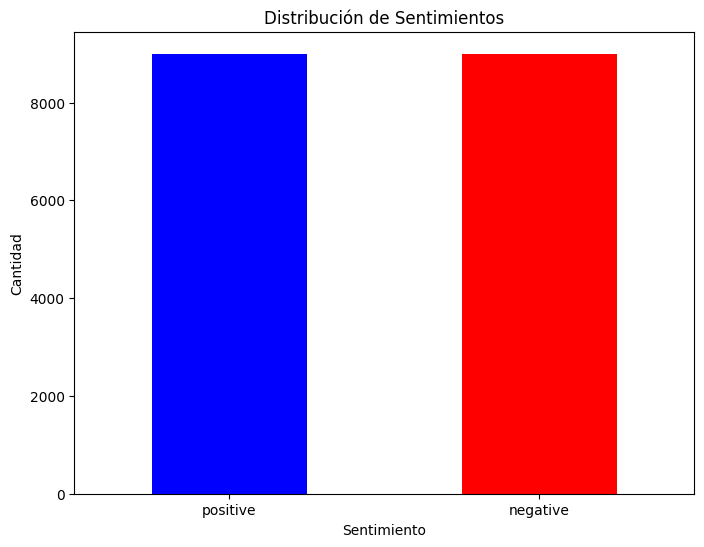

In [ ]:
import matplotlib.pyplot as plt
# Cuento los valores de 'positive' y 'negative' en la columna 'sentiment'
sentiment_counts = df_music_data['sentiment'].value_counts()

print(sentiment_counts)

# Pinto histograma
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

Como indica este histograma nuestra muestra queda completamente balanceada.

In [ ]:
music_data = df_music_data.to_dict('index')

In [ ]:
df_music_data.head(10)

,overall,reviewText,sentiment
0,5.0,I like all the artist in this band. They make ...,positive
1,5.0,This is an odd affair...released 2 years after...,positive
2,5.0,So glad to find their albums in CD format! The...,positive
3,5.0,This is one of the best Opeth albums ever!!! I...,positive
4,5.0,The best Portishead album out there. I have th...,positive
5,5.0,This was Benson at his very best. No one can m...,positive
6,5.0,Heart's Dog & Butterfly album from 1978 is a g...,positive
7,5.0,Let me tell you how I first learned of Gavin D...,positive
8,5.0,this cd is for anyone who is into the new rock...,positive
9,5.0,This is wonderful music for your listening ple...,positive


In [ ]:
len(music_data)

18000

In [ ]:
# Verifico valores nulos
print(df_music_data.isnull().sum())

overall       0
reviewText    0
sentiment     0
dtype: int64


In [ ]:
music_data.get(60)

{'overall': 5.0,
 'reviewText': 'These 2 recordings are simply the best ones available, and it\'s due to the combination of a masterful conductor and a world-class orchestra in a superb hall with killer organ, and inspired interpretations. If only RCA or Mercury could have recorded these instead of DGG. Even with thin bass, overly close micing at times, and curiously distant micing at others, the performances survive as the best ever.\n\n  Much of the magic here is summed up in one word: tempos! Many have noted Steinberg\'s fast tempos in the Holst, often sighting Mars as particularly too fast. Well, they are plan wrong. The composer himself recorded this suite electrically in 1926. You think Steinberg\'s 46 minutes is fast? Holst gets through it in under 41! Now some have said the engineers rushed him so as to get the music to fit on the old 78 discs. That is totally false. Others have said he wasn\'t a good conductor. OK, ensemble sloppiness bears that out, but doesn\'t hold water wh

In [ ]:
review = music_data.get(60).get('reviewText')
print(review)

These 2 recordings are simply the best ones available, and it's due to the combination of a masterful conductor and a world-class orchestra in a superb hall with killer organ, and inspired interpretations. If only RCA or Mercury could have recorded these instead of DGG. Even with thin bass, overly close micing at times, and curiously distant micing at others, the performances survive as the best ever.

  Much of the magic here is summed up in one word: tempos! Many have noted Steinberg's fast tempos in the Holst, often sighting Mars as particularly too fast. Well, they are plan wrong. The composer himself recorded this suite electrically in 1926. You think Steinberg's 46 minutes is fast? Holst gets through it in under 41! Now some have said the engineers rushed him so as to get the music to fit on the old 78 discs. That is totally false. Others have said he wasn't a good conductor. OK, ensemble sloppiness bears that out, but doesn't hold water when it comes to basic tempi. Holst marked

In [ ]:
sentences = review.split('.')
print(sentences[:2])

["These 2 recordings are simply the best ones available, and it's due to the combination of a masterful conductor and a world-class orchestra in a superb hall with killer organ, and inspired interpretations", ' If only RCA or Mercury could have recorded these instead of DGG']


In [ ]:
sentence = sentences[0]
print(sentence)

These 2 recordings are simply the best ones available, and it's due to the combination of a masterful conductor and a world-class orchestra in a superb hall with killer organ, and inspired interpretations


In [ ]:
sentence = sentence.strip()

# Spacy

In [ ]:
!pip install -U spacy download en_core_web_sm

In [ ]:
import spacy
import en_core_web_sm

In [ ]:
nlp_en = en_core_web_sm.load()

In [ ]:
nlp_en.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7ff34b9d5660>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7ff34bd46c80>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7ff35110b1b0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7ff34b139380>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7ff34bde1080>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7ff351140f90>)]

In [ ]:
doc = nlp_en(sentence)

In [ ]:
for idx, token in enumerate(doc):
    print('Token {0:5}{1:5}'.format(str(idx), token.text))

Token 0    These
Token 1    2    
Token 2    recordings
Token 3    are  
Token 4    simply
Token 5    the  
Token 6    best 
Token 7    ones 
Token 8    available
Token 9    ,    
Token 10   and  
Token 11   it   
Token 12   's   
Token 13   due  
Token 14   to   
Token 15   the  
Token 16   combination
Token 17   of   
Token 18   a    
Token 19   masterful
Token 20   conductor
Token 21   and  
Token 22   a    
Token 23   world
Token 24   -    
Token 25   class
Token 26   orchestra
Token 27   in   
Token 28   a    
Token 29   superb
Token 30   hall 
Token 31   with 
Token 32   killer
Token 33   organ
Token 34   ,    
Token 35   and  
Token 36   inspired
Token 37   interpretations


In [ ]:
# Analizar los tokens y sus propiedades
print('{0:15}{1:15}{2:10}'.format('Token', 'Shape', 'is_alpha'))
for token in doc:
    print('{0:15}{1:15}{2:10}'.format(token.text, token.shape_, str(token.is_alpha)))


Token          Shape          is_alpha  
These          Xxxxx          True      
2              d              False     
recordings     xxxx           True      
are            xxx            True      
simply         xxxx           True      
the            xxx            True      
best           xxxx           True      
ones           xxxx           True      
available      xxxx           True      
,              ,              False     
and            xxx            True      
it             xx             True      
's             'x             False     
due            xxx            True      
to             xx             True      
the            xxx            True      
combination    xxxx           True      
of             xx             True      
a              x              True      
masterful      xxxx           True      
conductor      xxxx           True      
and            xxx            True      
a              x              True      
world          x

# Stop words

In [ ]:
# Eliminar stop words
from spacy.lang.en.stop_words import STOP_WORDS

print(list(STOP_WORDS)[:20])

['ever', 'show', 'made', 'well', 'afterwards', 'itself', 'name', 'hereafter', 'meanwhile', 'whatever', 'on', 'hence', 'both', 'neither', 'further', 'into', 'every', 'there', 'less', 'see']


In [ ]:
ex_text_1 = sentence
[word for word in ex_text_1.lower().split() if word not in STOP_WORDS]

['2',
 'recordings',
 'simply',
 'best',
 'ones',
 'available,',
 "it's",
 'combination',
 'masterful',
 'conductor',
 'world-class',
 'orchestra',
 'superb',
 'hall',
 'killer',
 'organ,',
 'inspired',
 'interpretations']

# PoS Tagging

In [ ]:
# Accedemos al token.pos_ para saber la etiqueta que tiene

print('{0:20}{1:10}'.format('Token', 'pos'))
for idx, token in enumerate(doc):
    print('{0:20}{1:10}'.format(token.text, token.pos_))

Token               pos       
These               DET       
2                   NUM       
recordings          NOUN      
are                 AUX       
simply              ADV       
the                 DET       
best                ADJ       
ones                NOUN      
available           ADJ       
,                   PUNCT     
and                 CCONJ     
it                  PRON      
's                  AUX       
due                 ADJ       
to                  ADP       
the                 DET       
combination         NOUN      
of                  ADP       
a                   DET       
masterful           ADJ       
conductor           NOUN      
and                 CCONJ     
a                   DET       
world               NOUN      
-                   PUNCT     
class               NOUN      
orchestra           NOUN      
in                  ADP       
a                   DET       
superb              NOUN      
hall                NOUN      
with    

# Lemmatization

In [ ]:
print('{0:20}{1:20}{2:10}'.format('Token', 'Lemma', 'PoS Tag'))
for idx, token in enumerate(doc):
    print('{0:20}{1:20}{2:10}'.format(token.text, token.lemma_, token.pos_))

Token               Lemma               PoS Tag   
These               these               DET       
2                   2                   NUM       
recordings          recording           NOUN      
are                 be                  AUX       
simply              simply              ADV       
the                 the                 DET       
best                good                ADJ       
ones                one                 NOUN      
available           available           ADJ       
,                   ,                   PUNCT     
and                 and                 CCONJ     
it                  it                  PRON      
's                  be                  AUX       
due                 due                 ADJ       
to                  to                  ADP       
the                 the                 DET       
combination         combination         NOUN      
of                  of                  ADP       
a                   a          

# Normalización

In [ ]:
sentence = sentence.lower()
sentence

"these 2 recordings are simply the best ones available, and it's due to the combination of a masterful conductor and a world-class orchestra in a superb hall with killer organ, and inspired interpretations"

In [ ]:
# Solo minúsculas y números
import re
sentence = re.sub(r'[^a-z0-9]+', ' ', sentence)

In [ ]:
sentence

'these 2 recordings are simply the best ones available and it s due to the combination of a masterful conductor and a world class orchestra in a superb hall with killer organ and inspired interpretations'

# Elimino puntuación

In [ ]:
import string

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
table = str.maketrans('', '', string.punctuation)

In [ ]:
resultado = []
for word in sentence.split():
  resultado.append(word.translate(table))
print(resultado)

['these', '2', 'recordings', 'are', 'simply', 'the', 'best', 'ones', 'available', 'and', 'it', 's', 'due', 'to', 'the', 'combination', 'of', 'a', 'masterful', 'conductor', 'and', 'a', 'world', 'class', 'orchestra', 'in', 'a', 'superb', 'hall', 'with', 'killer', 'organ', 'and', 'inspired', 'interpretations']


In [ ]:
import string
table = str.maketrans('', '', string.punctuation)
' '.join([word.translate(table) for word in sentence.split()])

'these 2 recordings are simply the best ones available and it s due to the combination of a masterful conductor and a world class orchestra in a superb hall with killer organ and inspired interpretations'

# Eliminar acentos

In [ ]:
import unicodedata

In [ ]:
unicodedata.normalize('NFKD', sentence).encode('ascii', 'ignore').decode('utf-8', 'ignore')

'these 2 recordings are simply the best ones available and it s due to the combination of a masterful conductor and a world class orchestra in a superb hall with killer organ and inspired interpretations'

In [ ]:
pip install num2words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=7e297f0cd91cff23fc4d309ad913e5db6fe8cfb4e748c16c850fd9b93210b97e
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


# Pipeline

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from num2words import num2words
import unicodedata
from spacy.lang.en.stop_words import STOP_WORDS

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Función para preprocesar el texto
def preprocess_text(text):
    # Converto a minúsculas
    text = text.lower()
    # Elimino acentos
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    # Tokenizar
    words = word_tokenize(text)
    # Convierto números a palabras
    words = [num2words(word) if word.isdigit() else word for word in words]
    # Uno palabras para aplicar la expresión regular
    text = ' '.join(words)
    # Aplico la expresión regular para eliminar tokens como '1981s'
    text = re.sub(r'\b\d+\w*\b', '', text)
    # Elimino puntuación
    text = ''.join([char for char in text if char not in string.punctuation])
    # Tokenizo de nuevo después de aplicar la expresión regular
    words = word_tokenize(text)
    # Elimino stopwords utilizando las de spaCy
    stop_words = set(STOP_WORDS)
    words = [word for word in words if word not in stop_words]
    # Lematización
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Vuelvo a unir y elimino espacios al principio y final
    return ' '.join(words).strip()

# Ejemplo de uso de la función
sample_text = "In 2023, I listened to 5 albums by the Rolling Stones and rediscovered many timeless hits from the 1980s and 1990s."
print(preprocess_text(sample_text))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


thousand twentythree listened album rolling stone rediscovered timeless hit


A juzgar por el sample_text mi pipeline de preprocesamiento funciona correctamente.

# Aplico la función de preprocesamiento

In [ ]:
# Aplico la función de preprocesamiento a la columna de texto
df_music_data['review_preprocess'] = df_music_data['reviewText'].apply(preprocess_text)

In [ ]:
df_music_data

,overall,reviewText,sentiment,review_preprocess
0,5.0,I like all the artist in this band. They make ...,positive,like artist band good music good album
1,5.0,This is an odd affair...released 2 years after...,positive,odd affair released year thousand eightyone s ...
2,5.0,So glad to find their albums in CD format! The...,positive,glad find album cd format song brought great m...
3,5.0,This is one of the best Opeth albums ever!!! I...,positive,best opeth album nt think dull moment album dr...
4,5.0,The best Portishead album out there. I have th...,positive,best portishead album listen
...,...,...,...,...
17995,2.0,Say you where an alien from another planetary ...,negative,alien planetary system landed earth thousand n...
17996,2.0,Philip Glass didn't create anything new with t...,negative,philip glass nt create new cd s famous living ...
17997,2.0,nothing but a flat prelude of Cult's dissoluti...,negative,flat prelude cult s dissolution cult firsttime...
17998,2.0,"This was an ""OK"" concert; BUT out in the Red R...",negative,ok concert red rock canyon sound displaced orc...


# Guardo avance

Guardo los avances hasta este punto para continuar desde aqui.

In [ ]:
# Defino la ruta en Google Drive donde voy a guardar el archivo CSV
ruta = '/content/drive/My Drive/NLP/df_music_data_clean.csv'

# Guardo el DataFrame como CSV
df_music_data.to_csv(ruta, index=False)

# Cargo archivo df_music_data_clean

In [2]:
import pandas as pd
import numpy as np
import json

from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/My Drive/NLP/df_music_data_clean.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [3]:
df_music_data = df

In [4]:
df

,overall,reviewText,sentiment,review_preprocess
0,5.0,I like all the artist in this band. They make ...,positive,like artist band good music good album
1,5.0,This is an odd affair...released 2 years after...,positive,odd affair released year thousand eightyone s ...
2,5.0,So glad to find their albums in CD format! The...,positive,glad find album cd format song brought great m...
3,5.0,This is one of the best Opeth albums ever!!! I...,positive,best opeth album nt think dull moment album dr...
4,5.0,The best Portishead album out there. I have th...,positive,best portishead album listen
...,...,...,...,...
17995,2.0,Say you where an alien from another planetary ...,negative,alien planetary system landed earth thousand n...
17996,2.0,Philip Glass didn't create anything new with t...,negative,philip glass nt create new cd s famous living ...
17997,2.0,nothing but a flat prelude of Cult's dissoluti...,negative,flat prelude cult s dissolution cult firsttime...
17998,2.0,"This was an ""OK"" concert; BUT out in the Red R...",negative,ok concert red rock canyon sound displaced orc...


Selecciono unicamente con las columnas que de sentiment y review_preprocess para el procesado final previo a los modelos.

In [5]:
df = df [['sentiment', 'review_preprocess' ]]

In [6]:
df

,sentiment,review_preprocess
0,positive,like artist band good music good album
1,positive,odd affair released year thousand eightyone s ...
2,positive,glad find album cd format song brought great m...
3,positive,best opeth album nt think dull moment album dr...
4,positive,best portishead album listen
...,...,...
17995,negative,alien planetary system landed earth thousand n...
17996,negative,philip glass nt create new cd s famous living ...
17997,negative,flat prelude cult s dissolution cult firsttime...
17998,negative,ok concert red rock canyon sound displaced orc...


Compruebo si tras el preprocesado tenemos algún registro con valores NaN para la columna 'review_preprocess'.

In [7]:
# Verifico si hay NaN en la columna y contarlos
print(df['review_preprocess'].isna().sum())

1


In [8]:
df[df['review_preprocess'].isna()]

,sentiment,review_preprocess
12368,negative,NaN


In [9]:
df_music_data[df['review_preprocess'].isna()]

,overall,reviewText,sentiment,review_preprocess
12368,1.0,NO NO NO NO NO NO NO NO NO NO NO NO NO NO NO N...,negative,NaN


Una vez vistos este registro decido eliminarlo para este caso.

In [10]:
df = df.dropna(subset=['review_preprocess'])

In [11]:
df['review_preprocess'].isna().sum()

0

# Cardinalidad

In [12]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
# Convierto todos los valores a cadenas y eliminar los valores nulos
df['review_preprocess'] = df['review_preprocess'].astype(str).fillna('')

# Combino todas las reviews en una sola cadena
corpus = ' '.join(df['review_preprocess'])

# Tokenizo la cadena combinada
tokens = word_tokenize(corpus)

# Calculo la cardinalidad (número de palabras únicas)
unique_tokens = set(tokens)
cardinalidad = len(unique_tokens)

print(f"La cardinalidad del corpus es: {cardinalidad}")

<ipython-input-13-19f4486d68b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_preprocess'] = df['review_preprocess'].astype(str).fillna('')


La cardinalidad del corpus es: 60783


# Nº de reviews positivas y negativas

In [14]:
reviews_count = df.groupby('sentiment')['review_preprocess'].count()

print("Número de reviews en 'review_preprocess' por cada categoría de 'sentiment':")
print(reviews_count)

Número de reviews en 'review_preprocess' por cada categoría de 'sentiment':
sentiment
negative    8999
positive    9000
Name: review_preprocess, dtype: int64


# N-grams más frecuentes

In [ ]:
import pandas as pd
from nltk import ngrams, FreqDist
from collections import Counter

def get_ngrams_by_sentiment(texts, sentiments, n=2):
    sentiment_ngrams = {}
    for sentiment, group_texts in texts.groupby(sentiments):
        all_ngrams = []
        for text in group_texts:
            words = text.split()
            n_grams = list(ngrams(words, n))
            all_ngrams.extend(n_grams)
        sentiment_ngrams[sentiment] = FreqDist(all_ngrams)
    return sentiment_ngrams

# Aplico la función
ngrams_by_sentiment = get_ngrams_by_sentiment(df['review_preprocess'], df['sentiment'], n=2)

# Muestro los 10 bigrams más comunes para cada categoría de 'sentiment'
for sentiment, freq_dist in ngrams_by_sentiment.items():
    print(f"\n10 bigrams más comunes para el sentimiento {sentiment}:")
    for bigram, frequency in freq_dist.most_common(10):
        print(f"{bigram}: {frequency}")

# Para trigrams
trigrams_by_sentiment = get_ngrams_by_sentiment(df['review_preprocess'], df['sentiment'], n=3)

# Muestro los 10 trigrams más comunes para cada categoría de 'sentiment'
for sentiment, freq_dist in trigrams_by_sentiment.items():
    print(f"\n10 trigrams más comunes para el sentimiento {sentiment}:")
    for trigram, frequency in freq_dist.most_common(10):
        print(f"{trigram}: {frequency}")



10 bigrams más comunes para el sentimiento negative:
('sound', 'like'): 1331
('good', 'song'): 660
('song', 'album'): 501
('album', 's'): 485
('album', 'nt'): 470
('nt', 'know'): 456
('song', 'like'): 454
('cd', 's'): 400
('song', 'nt'): 391
('greatest', 'hit'): 360

10 bigrams más comunes para el sentimiento positive:
('sound', 'like'): 678
('album', 's'): 626
('song', 'album'): 608
('great', 'song'): 544
('song', 'like'): 501
('s', 'best'): 491
('best', 'song'): 475
('band', 's'): 440
('title', 'track'): 430
('good', 'song'): 408

10 trigrams más comunes para el sentimiento negative:
('datahook', 'productlinklinked', 'class'): 146
('productlinklinked', 'class', 'alinknormal'): 146
('class', 'alinknormal', 'href'): 146
('nbsp', 'datahook', 'productlinklinked'): 119
('rock', 'n', 'roll'): 98
('song', 'sound', 'like'): 78
('album', 'sound', 'like'): 73
('nt', 'sound', 'like'): 72
('best', 'song', 'album'): 69
('greatest', 'hit', 'album'): 66

10 trigrams más comunes para el sentimiento

- Se observa una gran coincidencia entre los bigramas y trigramas de ambos sentimientos
- ('hundred', 'and'), ('nine', 'hundred'), ('one', 'thousand,'), y ('thousand,', 'nine') son muy frecuentes en ambos casos. Esto sugiere que pueden haber muchas referencias a años o numeros de venta por ejemplo.
- ('good', 'song') son específicos de los comentarios positivos, indicando elogios directos hacia las canciones.
- En las reviews con comentarios negativos Trigrams como ('nine', 'hundred', 'and'), ('thousand,', 'nine', 'hundred'). Esto podría indicar que los números o fechas son un tema común en las críticas negativas.
- Los comentarios positivos incluyen más elogios directos hacia las canciones, mientras que los negativos incluyen más comparaciones y críticas de calidad.

# Nube de palabras

In [ ]:
pip install wordcloud matplotlib

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    # Creo la nube de palabras
    wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110, background_color='white').generate(text)
    # Configuración de la visualización
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

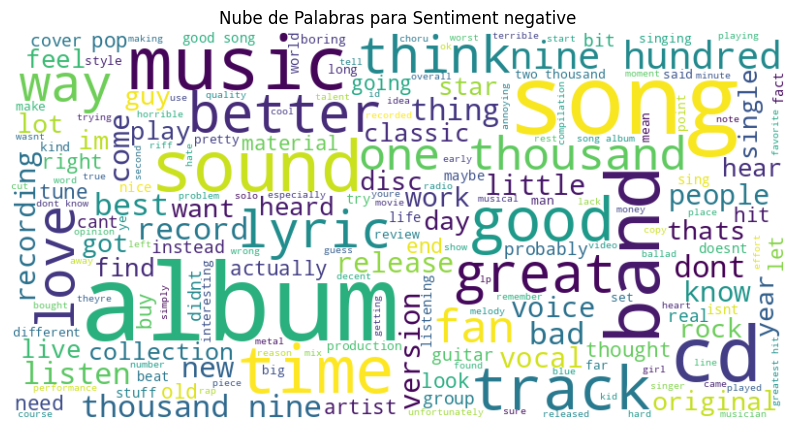

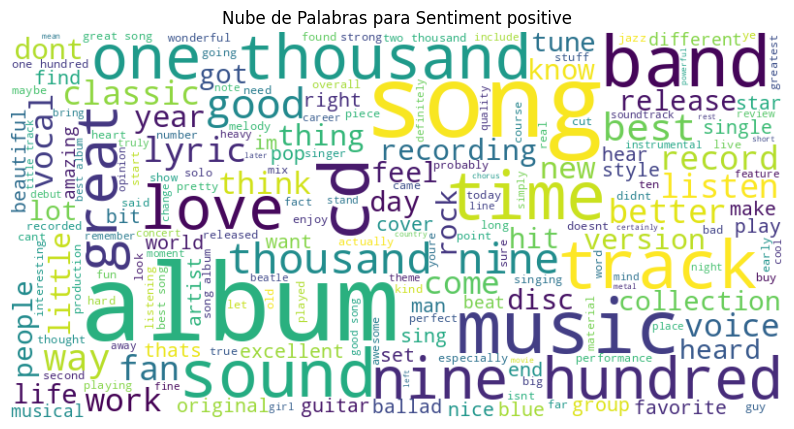

In [ ]:
for sentiment, group in df.groupby('sentiment'):
    # Concateno todos los textos en un único string
    combined_text = ' '.join(group['review_preprocess'])
    # Genero la nube de palabras para cada categoría de sentimiento
    generate_wordcloud(combined_text, f"Nube de Palabras para Sentiment {sentiment}")

Podemos ver que tanto en la nube de palabras para sentimientos positivos como en la de sentimientos negativos, coinciden muchas de las palabras.
Puede ser normal que palabras como song o album coincidan en ambos casos

# Vectorización reviews

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializar el vectorizador TF-IDF con un límite de 10,000 características
vectorizer = TfidfVectorizer(max_features=10000)

# Ajusto y transformo los datos de texto
X = vectorizer.fit_transform(df['review_preprocess'])

# Codificación de variable objetivo

In [16]:
from sklearn.preprocessing import LabelEncoder

# Creo una instancia del LabelEncoder
label_encoder = LabelEncoder()

# Ajusto el codificador a las etiquetas y transformo
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

y = df['sentiment_encoded']

<ipython-input-16-16032be33440>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])


In [ ]:
df

,sentiment,review_preprocess,sentiment_encoded
0,positive,like artist band good music good album,1
1,positive,odd affair released year thousand eightyone s ...,1
2,positive,glad find album cd format song brought great m...,1
3,positive,best opeth album nt think dull moment album dr...,1
4,positive,best portishead album listen,1
...,...,...,...
17995,negative,alien planetary system landed earth thousand n...,0
17996,negative,philip glass nt create new cd s famous living ...,0
17997,negative,flat prelude cult s dissolution cult firsttime...,0
17998,negative,ok concert red rock canyon sound displaced orc...,0


# Division entre train y test

In [17]:
from sklearn.model_selection import train_test_split

# Separo datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelos Machine learning

## Modelo de LogisticRegression

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

Training Accuracy: 0.8757552607819987
Test Accuracy: 0.7886111111111112

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1800
           1       0.79      0.79      0.79      1800

    accuracy                           0.79      3600
   macro avg       0.79      0.79      0.79      3600
weighted avg       0.79      0.79      0.79      3600



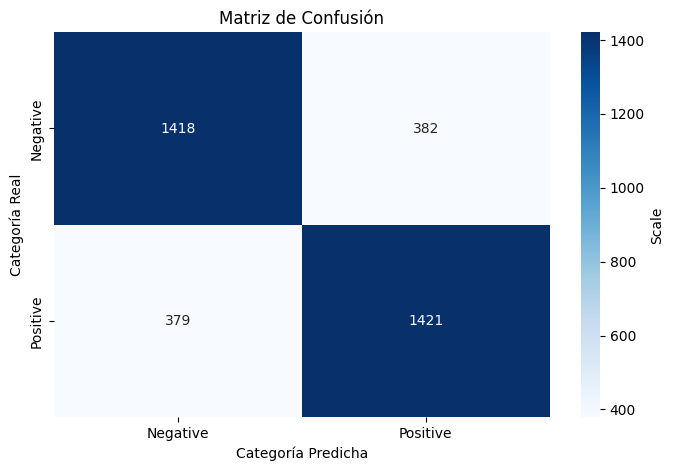

In [ ]:
# Modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluo el modelo en el conjunto de entrenamiento
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# Evaluo el modelo en el conjunto de prueba
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

# Informe de clasificación para el conjunto de prueba
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, test_predictions))

# Matriz de confusión para el conjunto de prueba
conf_matrix = confusion_matrix(y_test, test_predictions)

# Matriz de confusión con Seaborn
categories = ['Negative', 'Positive']
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Scale'},
            xticklabels=categories, yticklabels=categories)
plt.title('Matriz de Confusión')
plt.ylabel('Categoría Real')
plt.xlabel('Categoría Predicha')
plt.show()

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.1s
[CV] END ................................C=0.001, penalty=l1; total time=   0.1s
[CV] END ................................C=0.001, penalty=l1; total time=   0.1s
[CV] END ................................C=0.001, penalty=l1; total time=   0.1s
[CV] END ................................C=0.001, penalty=l1; total time=   0.1s
[CV] END ................................C=0.001, penalty=l1; total time=   0.1s
[CV] END ................................C=0.001, penalty=l1; total time=   0.1s
[CV] END ................................C=0.001, penalty=l1; total time=   0.1s
[CV] END ................................C=0.001, penalty=l1; total time=   0.1s
[CV] END ................................C=0.001, penalty=l1; total time=   0.2s
[CV] END ................................C=0.001, penalty=l2; total time=   0.3s
[CV] END ................................C=0.0

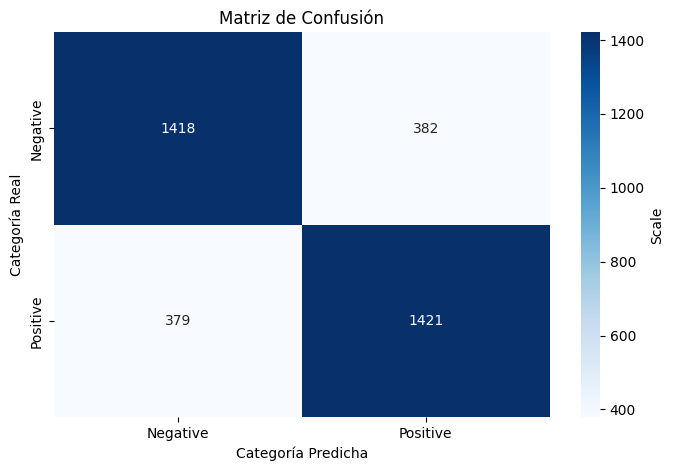

In [ ]:
param_grid = {
    'C': np.logspace(-3, 3, 7),  # Valores de C desde 0.001 hasta 1000
    'penalty': ['l1', 'l2'],  # L1 y L2 como opciones de penalización
}

# Modelo
logreg = LogisticRegression(solver='liblinear', max_iter=200)

# Validacion cruzada con 10-fold cross validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=10, verbose=2, scoring='accuracy')

# Ajusta GridSearchCV
grid_search.fit(X_train, y_train)

# Obtengo el mejor modelo
model = grid_search.best_estimator_

# Evaluo el modelo en el conjunto de entrenamiento
train_predictions_grid = model.predict(X_train)
train_accuracy_grid = accuracy_score(y_train, train_predictions_grid)
print("Training Accuracy:", train_accuracy_grid)

# Evaluo el modelo en el conjunto de prueba
test_predictions_grid = model.predict(X_test)
test_accuracy_grid = accuracy_score(y_test, test_predictions_grid)
print("Test Accuracy:", test_accuracy_grid)

# Informe de clasificación
print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, test_predictions_grid))

# Matriz de confusión para el conjunto de prueba
conf_matrix = confusion_matrix(y_test, test_predictions_grid)

# Matriz de confusión con Seaborn
categories = ['Negative', 'Positive']
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Scale'},
            xticklabels=categories, yticklabels=categories)
plt.title('Matriz de Confusión')
plt.ylabel('Categoría Real')
plt.xlabel('Categoría Predicha')
plt.show()

## Comentarios

- Primero llevo a cabo una regresión logística simple para y posteriormente intento mejorar los resultados aplicando la validación cruzada para probar sistemáticamente varias combinaciones de parámetros y encontrar la que produce el mejor rendimiento del modelo.
- No se aprecia mejoría en los resultados a pesar de utilizar la validación cruzada.
- De hecho, los resultados son prácticamente iguales e incluso el modelo que incluye validación cruzada da peores resultados.

## Conclusiones

- El accuracy de train muestra mejores resultados que el de train.
- El sobreajuste no parece ser severo.
- El modelo podría estar aprendiendo patrones específicos de los datos de entrenamiento que no generalizan completamente a nuevos datos.


# Modelo Deep Learning

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [19]:

# Configuración de la tokenización y secuencias
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['review_preprocess'])
X = tokenizer.texts_to_sequences(df['review_preprocess'])
X = pad_sequences(X, maxlen=max_len)

y = df['sentiment_encoded'].values

# Partición de datos train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Epoch 1/60
360/360 [==============================] - 47s 107ms/step - loss: 0.7474 - accuracy: 0.5179 - val_loss: 0.6911 - val_accuracy: 0.5219
Epoch 2/60
360/360 [==============================] - 17s 48ms/step - loss: 0.6711 - accuracy: 0.5850 - val_loss: 0.5850 - val_accuracy: 0.6910
Epoch 3/60
360/360 [==============================] - 9s 25ms/step - loss: 0.4641 - accuracy: 0.7927 - val_loss: 0.5624 - val_accuracy: 0.7156
Epoch 4/60
360/360 [==============================] - 6s 15ms/step - loss: 0.2119 - accuracy: 0.9202 - val_loss: 0.6731 - val_accuracy: 0.7233
Epoch 5/60
360/360 [==============================] - 5s 14ms/step - loss: 0.1052 - accuracy: 0.9629 - val_loss: 0.8845 - val_accuracy: 0.7076
Epoch 6/60
360/360 [==============================] - 6s 16ms/step - loss: 0.0695 - accuracy: 0.9780 - val_loss: 0.9598 - val_accuracy: 0.7191
Epoch 7/60
360/360 [==============================] - 4s 11ms/step - loss: 0.0519 - accuracy: 0.9826 - val_loss: 1.1979 - val_accuracy: 0.7

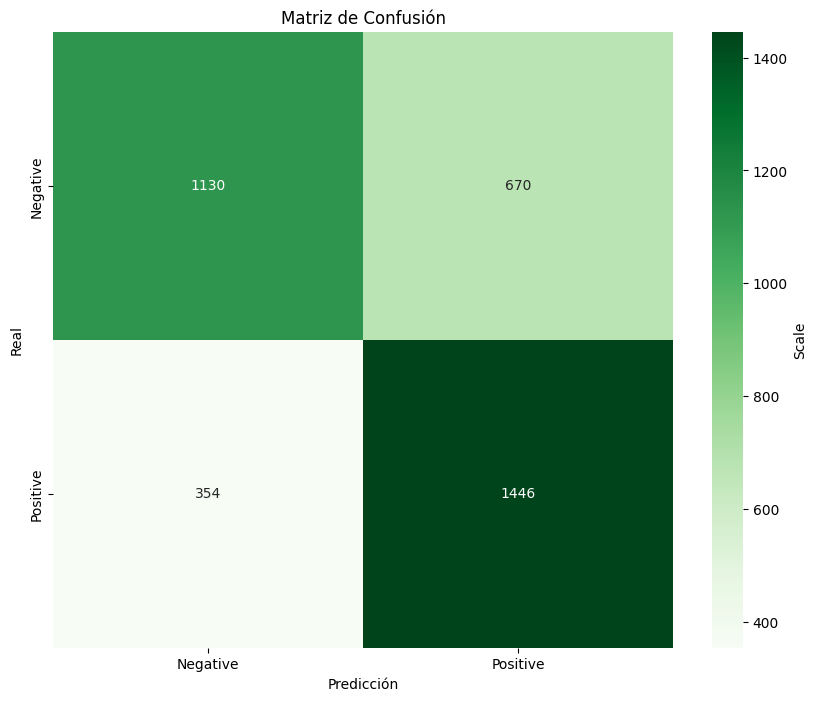

In [20]:
# Hiper-parámetros de la red
lr = 0.001
n_epochs = 60
batch_size = 32

# Modelo
model = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_len),
    Flatten(),  # Esta capa aplanará la salida de la capa de embedding
    Dense(128, activation='relu'),  # Capa más grande para aprender representaciones más complejas
    BatchNormalization(),  # Normalización para estabilizar y acelerar el entrenamiento
    Dropout(0.5),  # Dropout para reducir el sobreajuste
    Dense(64, activation='relu'),  # Otra capa densa con menos neuronas
    Dropout(0.5),  # Dropout
    Dense(32, activation='relu'),  # Reducción progresiva en el número de neuronas
    Dropout(0.3),  # Dropout menor
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# Modelo
optimizer = Adam(learning_rate=lr)
model.compile(optimizer = Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

# Entreno el modelo
early_stopping = EarlyStopping(monitor='val_loss',patience=30, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])

# Evaluo el modelo
_, train_accuracy = model.evaluate(X_train, y_train)
_, test_accuracy = model.evaluate(X_test, y_test)
print('Train Accuracy: %.2f' % (train_accuracy*100))
print('Test Accuracy: %.2f' % (test_accuracy*100))

# Predicciones y evaluación
y_pred = model.predict(X_test)
predicted_categories = np.round(y_pred).astype(int)
true_categories = y_test.astype(int)

# Matriz de confusión e informe de clasificación
conf_matrix = confusion_matrix(true_categories, predicted_categories)
class_report = classification_report(true_categories, predicted_categories, target_names=['Negative', 'Positive'])

# Mostrar matriz de confusión y clasificación
print(conf_matrix)
print(class_report)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar_kws={'label': 'Scale'}, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()


# Conclusiones

- Este modelo es propenso a clasificar erróneamente ejemplos negativos como positivos (bajo recall para negativos).
- El recall más alto para la clase positiva muestra que el modelo fue más eficiente en identificar correctamente los casos positivos.
- En este caso, el modelo de deep learning no ha mejorado los resultados obtenidos anteriormente con los modelos de regresión logística.
Podemos ver cómo los parámetros de precisión, recall y F1-score presentan valores muy inferiores.
- En este caso, el overfitting es mucho más acusado y evidente, y se puede observar cómo el modelo tiene dificultades para generalizar correctamente.
- El siguiente paso sería utilizar modelos preentrenados para intentar obtener unos resultados mejores.
- Podría probar con modelos preentrenados como DistilBERT, BERT y de esta forma buscar un modelo con el que obtuviera mejores resultados para la clasificación de reviews.